## Preprocessing Data

**Importing Dataset**

In [1]:
import glob
import pandas as pd

# get path and 
path = 'C:\\Users\\pearly\\OneDrive\\Desktop\\University Materials\\Unsupervised Learning\\01. clustering project\\star dataset'
csv_files = glob.glob(path + "/*.csv")

count = 0
for f in csv_files:
    count += 1
    exec(f'df_{count} =pd.read_csv(f)')

**Dimension of Dataset**

In [2]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df_1       DataFrame                  x         y<...>n[64000 rows x 8 columns]
df_10      DataFrame                  x         y<...>n[63984 rows x 8 columns]
df_11      DataFrame                  x         y<...>n[63983 rows x 8 columns]
df_12      DataFrame                  x         y<...>n[63983 rows x 8 columns]
df_13      DataFrame                  x         y<...>n[63981 rows x 8 columns]
df_14      DataFrame                  x         y<...>n[63981 rows x 8 columns]
df_15      DataFrame                  x         y<...>n[63978 rows x 8 columns]
df_16      DataFrame                  x         y<...>n[63977 rows x 8 columns]
df_17      DataFrame                  x         y<...>n[63976 rows x 8 columns]
df_18      DataFrame                  x         y<...>n[63973 rows x 8 columns]
df_19      DataFrame                  x         y<...>n[63970 rows x 8 columns]
df_2       DataFrame                  x         y<..

The shape of each dataframe contains different dimensions, which means not all of ID exists in each dataframe.<br>
**Get intersection of ID star from "id" column**

In [3]:
# store the all dataframes to list
# so they are iteratable
all_df = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,
         df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19]

# store all values from "ID" columns from all dataframes
# into a list 'all_stars_id'
all_stars_id = []
for i in all_df:
    stars_id = i['id']
    all_stars_id.append(stars_id)

# get the intersected id between all dataframes
# it returns into a set datatype
intersected_star_id = set.intersection(*map(set,all_stars_id))
# convert into list
intersected_star_id = list(intersected_star_id)
type(intersected_star_id)

# create a function to filtering the id
def filter_df_id(df,list):
    df = df[df['id'].isin(list)]
    return df

# apply function to all dataframes
count = 0
for i in all_df:
    count += 1
    exec(f'df_{count} =filter_df_id(i,intersected_star_id)')

## Visualization

In [4]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot_3d (df):
    # Creating dataset
    x = df['x']
    y = df['y']
    z = df['z']
    x_min = df['x'].min()
    x_max = df['x'].max()
    y_min = df['y'].min()
    y_max = df['y'].max()
    z_min = df['z'].min()
    z_max = df['z'].max()
    
    # Creating figure
    fig = plt.figure(figsize = (9, 6))
    ax = plt.axes(projection ="3d")
    color_map = plt.get_cmap('winter')
    
    # Creating #3D plot
    p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=0.5)
    fig.colorbar(p)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("star plot")
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # show plot
    return plt.show()

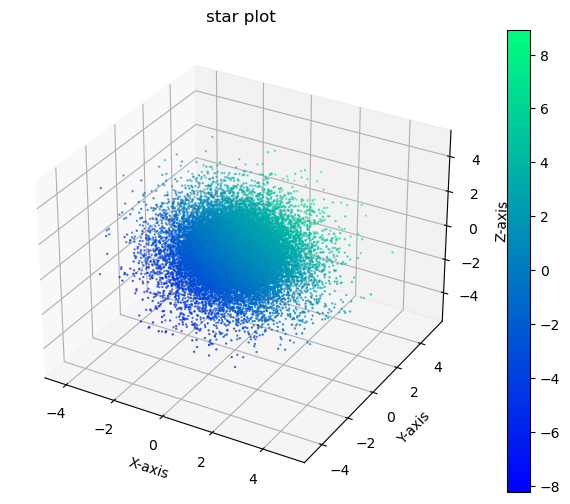

time1


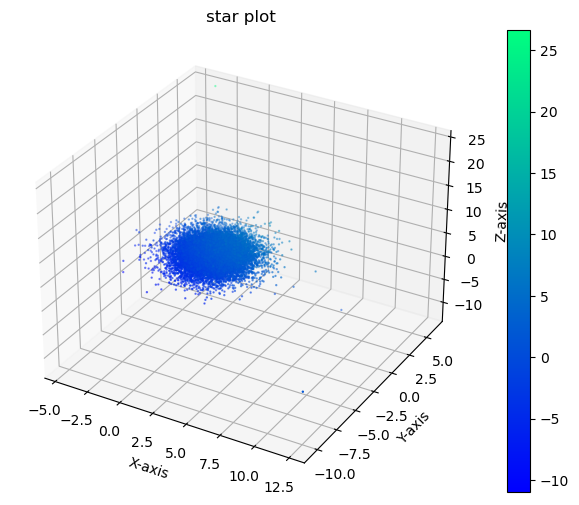

time2


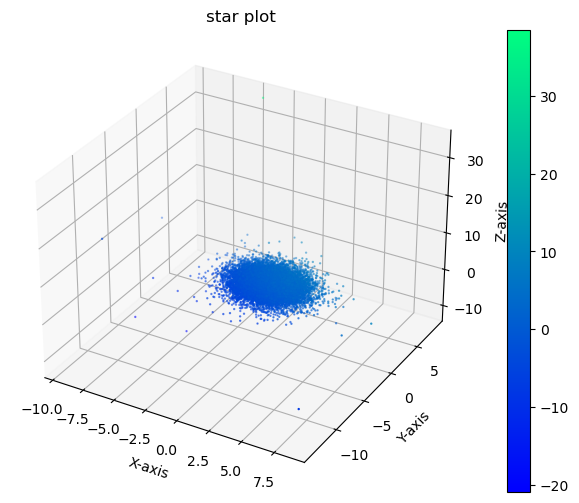

time3


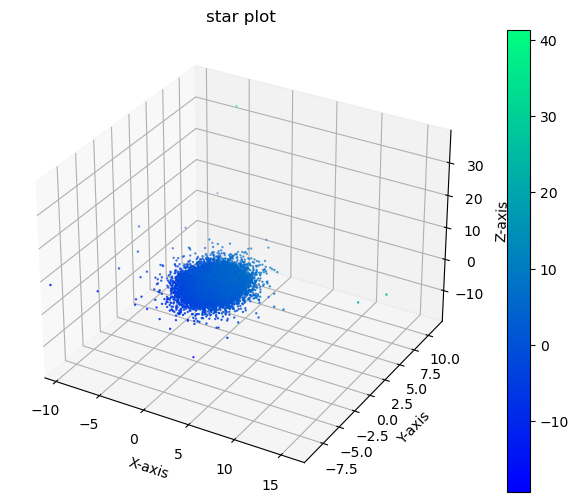

time4


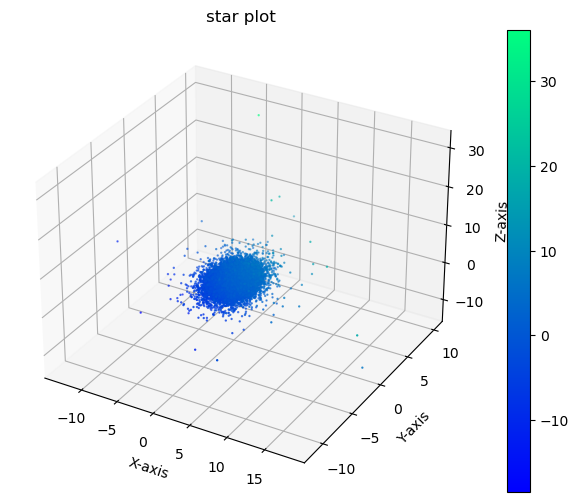

time5


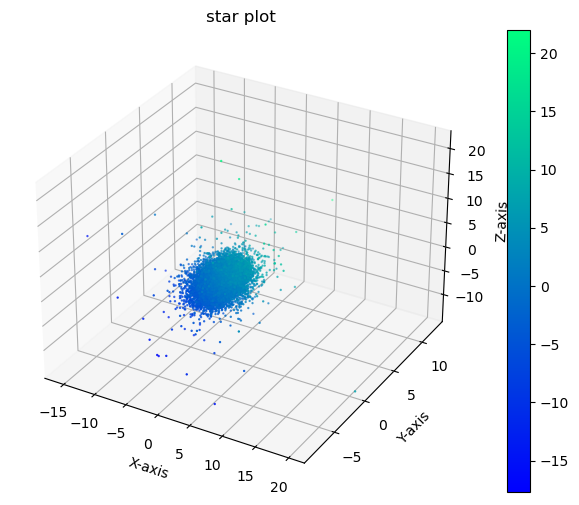

time6


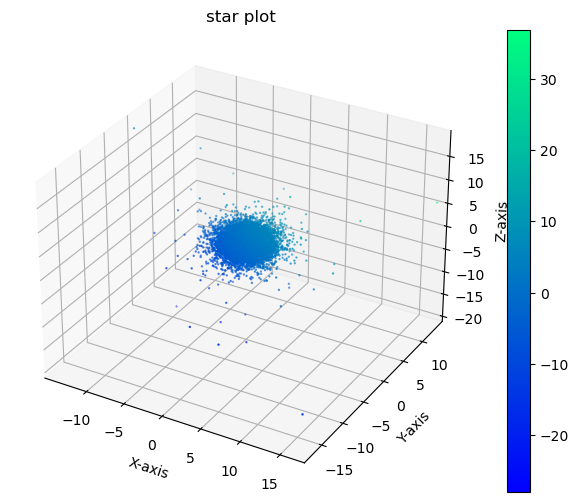

time7


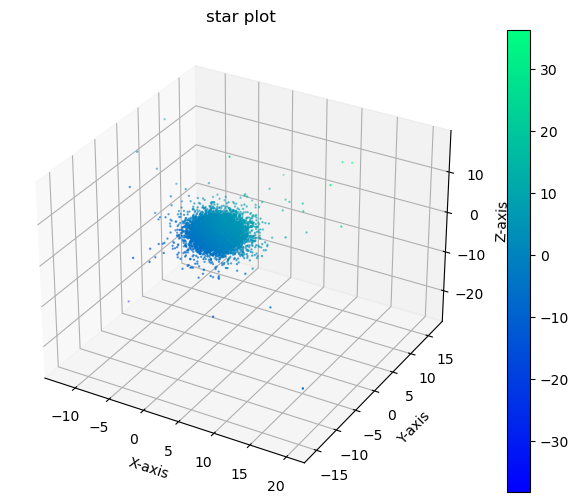

time8


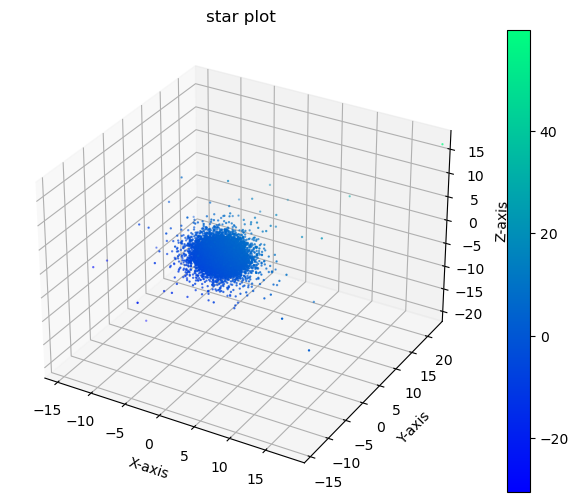

time9


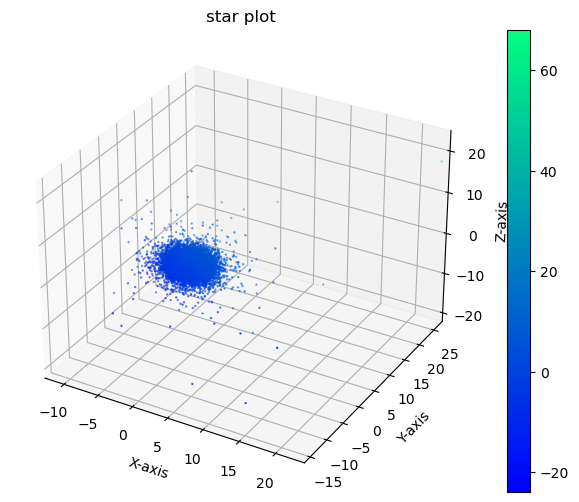

time10


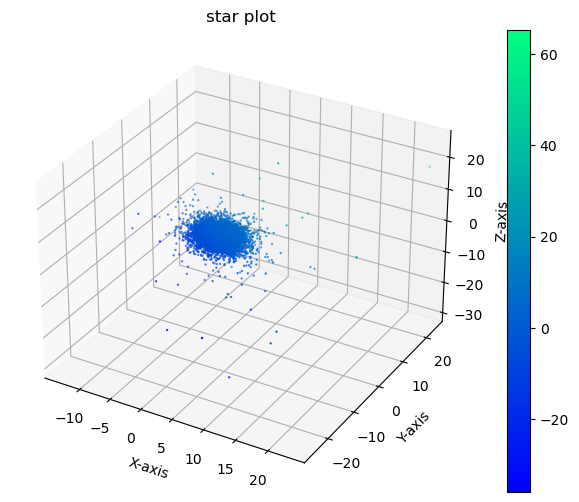

time11


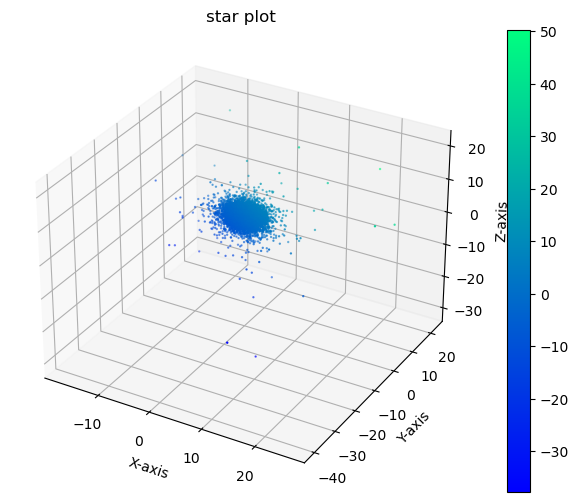

time12


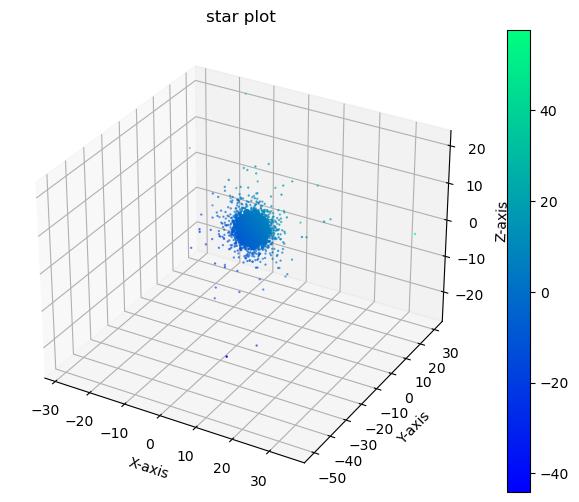

time13


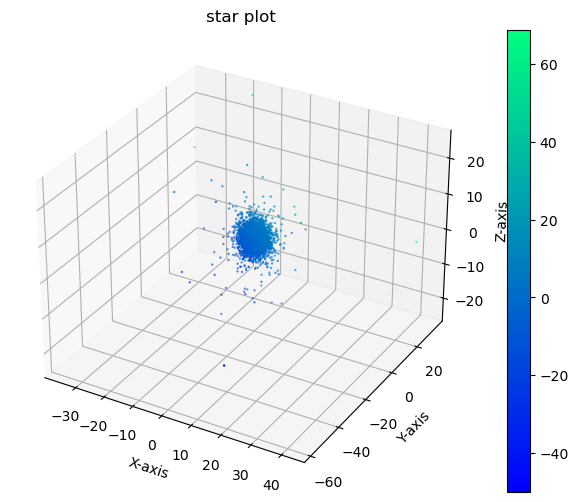

time14


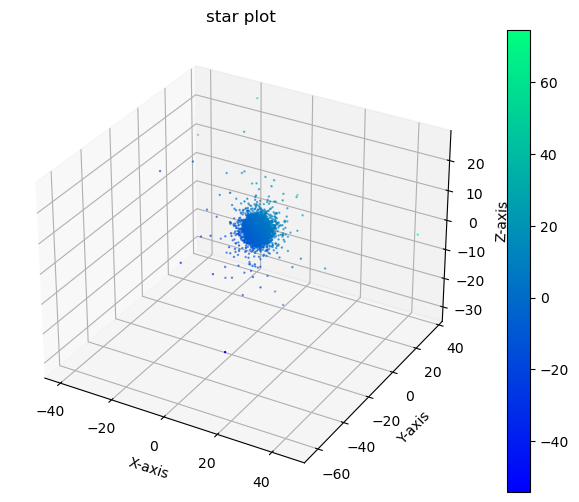

time15


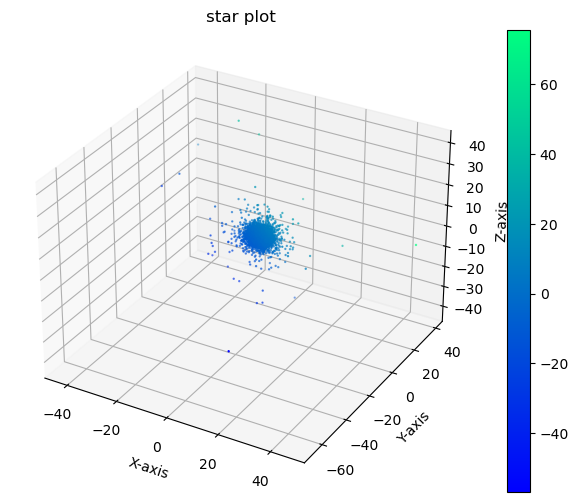

time16


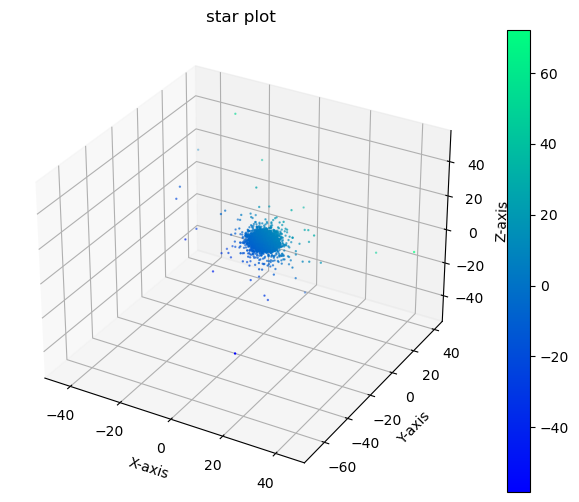

time17


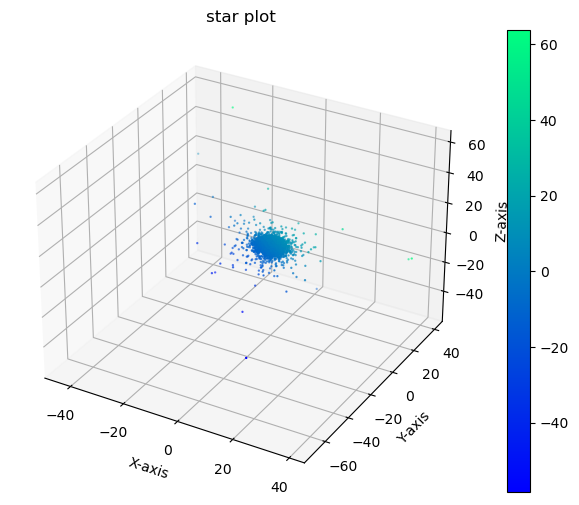

time18


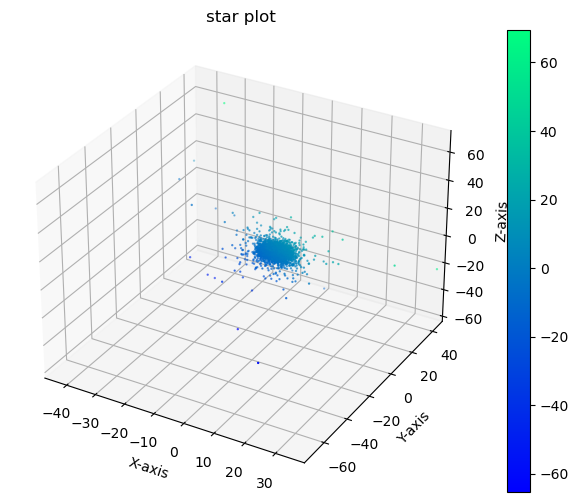

time19


In [26]:
count = 1
for i in all_df:
    plot_3d(i)
    print("time" + str(count))
    count += 1

## K-Means Elbow method
**taking one example of the first df** <br>
**df_1 , t = 0**

In [7]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [9]:
# drop the column of vx,vy,vz,m and ID
drop_cols = ['vx','vy','vz','m','id']
df_example = df_1.drop(drop_cols,axis=1)

In [10]:
df_example.columns

Index(['x', 'y', 'z'], dtype='object')

**find the optimal number of clusters**

In [11]:
distortions = []
cluster = range(1,20)
for c in cluster:
    kmeanModel = KMeans(n_clusters=c)
    kmeanModel.fit(df_example)
    distortions.append(kmeanModel.inertia_)

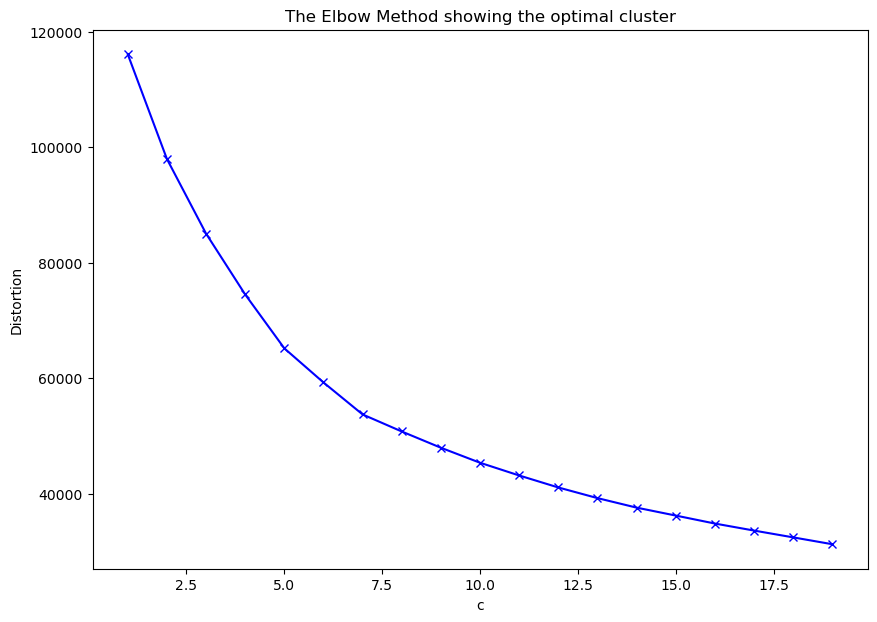

In [12]:
plt.figure(figsize=(10,7))
plt.plot(cluster, distortions, 'bx-')
plt.xlabel('c')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal cluster')
plt.show()

**choosing 13 clusters**

In [13]:
kmeanModel = KMeans(n_clusters=13)
kmeanModel.fit(df_example)

KMeans(n_clusters=13)

In [14]:
cluster = kmeanModel.labels_
df_example['cluster'] = cluster

In [15]:
df_example.head()

,x,y,z,cluster
0,0.485939,-0.524359,-0.531982,10
1,-0.065961,0.080844,-0.276031,0
2,-0.034809,0.076795,-0.390880,0
3,1.502104,1.442983,1.449747,7
4,-0.009554,0.538341,-0.267264,0


**find the centroids**

In [19]:
centroids = kmeanModel.cluster_centers_
centers = pd.DataFrame(centroids)
centers.head(3)

,0,1,2
0,0.073186,0.420923,-0.070997
1,1.556205,-0.136106,0.858261
2,-0.726107,-1.495778,-0.819940


In [17]:
centroids[:,0]

array([ 7.31860776e-02,  1.55620462e+00, -7.26106919e-01, -1.73055953e+00,
       -4.58542028e-01, -4.00582412e-01,  7.06714585e-03, -3.13885223e-02,
        1.16047276e+00,  1.45973666e+00,  3.91190331e-01,  1.38385441e-03,
       -1.03494766e+00])

In [18]:
centroids[:,1]

array([ 0.42092306, -0.13610601, -1.49577813, -0.20828524, -0.12940455,
        0.34273808, -1.35591652,  0.89808582,  1.35322282, -1.15859146,
       -0.28060344, -0.09386384,  1.57829141])

In [20]:
centroids[:,2]

array([-0.0709967 ,  0.85826061, -0.81993955,  0.62842476, -0.20786686,
       -1.68354113,  1.09157239,  1.52148406, -0.50274336, -1.07771908,
       -0.29381331,  0.34986034, -0.15541204])

**Plot the centrals**

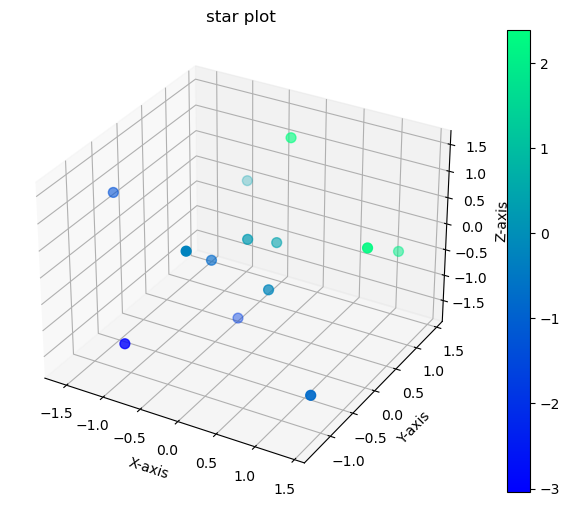

In [27]:
x = centers[0]
y = centers[1]
z = centers[2]
x_min = centers[0].min()
x_max = centers[0].max()
y_min = centers[1].min()
y_max = centers[1].max()
z_min = centers[2].min()
z_max = centers[2].max()
    
# Creating figure
fig = plt.figure(figsize = (9, 6))
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('winter')
    
# Creating #3D plot
p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=50)
fig.colorbar(p)
plt.axis([x_min, x_max, y_min, y_max])
plt.title("star plot")
    
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
    
# show plot
plt.show()